In [1]:
import phylustrator as ph 
import ete3 # Phylustrator uses ete3 trees under the hood. 

In [2]:
# 1. Load a Tree

tree_path = "../examples/data/basic/tree.nwk"
t = ete3.Tree(tree_path, format=1)

print(f"Loaded a tree with {len(t)} leaves.")

Loaded a tree with 20 leaves.


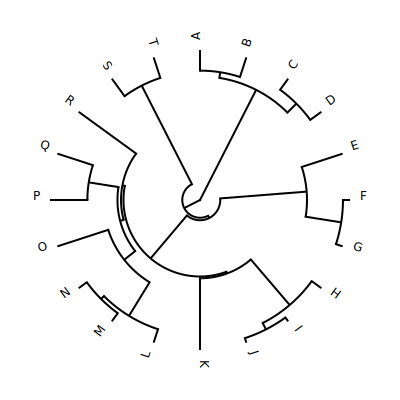

In [5]:
# 1. Define a style optimized for a circular plot
radial_style = ph.TreeStyle(
    width=400, 
    height=400,
    branch_size=2,
    radius=150,
    branch_color="black",
    leaf_size=0,
    node_size=0 
)

# 2. Initialize Radial Drawer
r_drawer = ph.RadialTreeDrawer(t, style=radial_style)

# 3. Basic Draw
r_drawer.add_leaf_names()
r_drawer.draw()
r_drawer.d

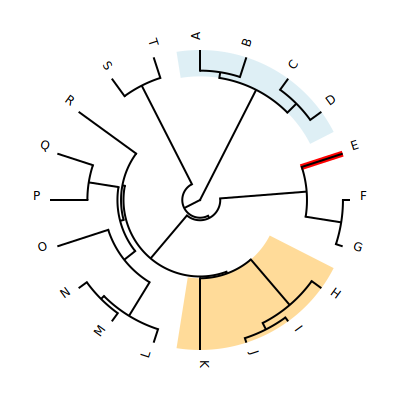

In [7]:
# Initialize
r_drawer = ph.RadialTreeDrawer(t, style=radial_style)
r_drawer.add_leaf_names()

# 1. Highlight Clades (Wedges)
# The drawer automatically calculates the angle span of the clade
target_node = t.get_common_ancestor("A", "D") 
r_drawer.highlight_clade(target_node, color="lightblue", opacity=0.4)

target_node_2 = t.get_common_ancestor("K", "H")
r_drawer.highlight_clade(target_node_2, color="orange", opacity=0.4)

# 2. Highlight a Specific Branch
leaf_f = t.search_nodes(name="E")[0]
r_drawer.highlight_branch(leaf_f, color="red", size=6)

r_drawer.draw()
r_drawer.d

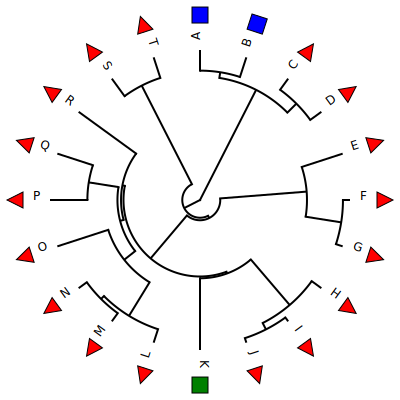

In [9]:
r_drawer = ph.RadialTreeDrawer(t, style=radial_style)

# 1. Add Squares
# These will rotate so their side is parallel to the tree ring
markers = {"A": "blue", "B": "blue", "K": "green"}
r_drawer.add_leaf_shapes(markers, shape="square", size=8, padding=35)

# 2. Add Triangles
# These will act like "arrowheads" pointing away from the center
others = {l: "red" for l in "CDEFGHIJLMNOPQRST"}
r_drawer.add_leaf_shapes(others, shape="triangle", size=8, padding=35)

r_drawer.add_leaf_names()
r_drawer.draw()
r_drawer.d

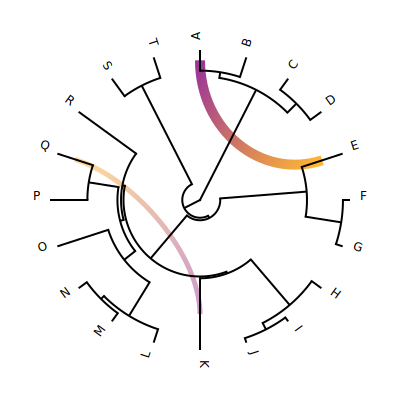

In [14]:
r_drawer = ph.RadialTreeDrawer(t, style=radial_style)

# The logic is identical, but the output is curved
transfers = [
    {'from': 'A', 'to': 'E', 'freq': 1.0},
    {'from': 'K', 'to': 'Q', 'freq': 0.5}
]

r_drawer.add_transfer_links(
    transfers, 
    gradient_colors=("purple", "orange"),
    arrows=False,          
    vary_width=True,      
    stroke_width=10,       
    opacity_scale=0.8
)

r_drawer.add_leaf_names()
r_drawer.draw()
r_drawer.d

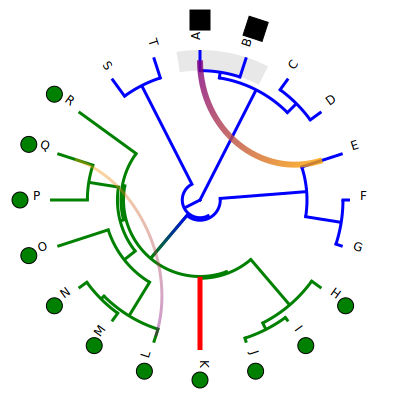

In [21]:
# Setup
final_radial_style = ph.TreeStyle(
    width=400, 
    height=400,
    radius = 150,
    branch_size=3,
    leaf_size=0,
    node_size=0
)

r_drawer = ph.RadialTreeDrawer(t, style=final_radial_style)

# --- A. PREPARE COLORS ---
# Blue Tree -> Green Subtree logic
node_colors = {n: "blue" for n in t.traverse()}
green_ancestor = t.get_common_ancestor("H", "R")
for n in green_ancestor.traverse():
    node_colors[n] = "green"


# --- B. BACKGROUND ---
clade_ab = t.get_common_ancestor("A", "B")
r_drawer.highlight_clade(clade_ab, color="lightgray", opacity=0.5)

# --- C. DRAW MAIN TREE ---
r_drawer.draw(branch2color=node_colors)

# --- D. FOREGROUND DECORATIONS ---

# 1. Gradient Bridge
r_drawer.gradient_branch(green_ancestor, colors=("blue", "green"), size=3)

# 2. Highlight Lineage
leaf_k = t.search_nodes(name="K")[0]
r_drawer.highlight_branch(leaf_k, color="red", size=5)

# 3. Transfer Links
# Note: In radial plots, links crossing the center look particularly striking
transfers = [
    {'from': 'A', 'to': 'E', 'freq': 1.0},
    {'from': 'L', 'to': 'Q', 'freq': 0.5}
]
r_drawer.add_transfer_links(
    transfers, 
    gradient_colors=("purple", "orange"), 
    arrows=False, 
    vary_width=True, 
    stroke_width=6,
    opacity_scale=0.8
)

# 4. Shapes (Rotated)
squares = {"A": "black", "B": "black"}
r_drawer.add_leaf_shapes(squares, shape="square", size=10, padding=30)

green_leaves = {leaf.name: "green" for leaf in green_ancestor.get_leaves()}
r_drawer.add_leaf_shapes(green_leaves, shape="circle", size=8, padding=30)

# 5. Text
r_drawer.add_leaf_names()

# Display
r_drawer.d